# TensolFlow

## base

### constant

In [1]:
!pip install tensorflow==1.15.0

import tensorflow as tf
import numpy as np

# それぞれ定数を定義
a = tf.constant(1)
b = tf.constant(2, dtype=tf.float32, shape=[3,2])
c = tf.constant(np.arange(4), dtype=tf.float32, shape=[2,2])

print('a:', a)
print('b:', b)
print('c:', c)

sess = tf.Session()

print('a:', sess.run(a))
print('b:', sess.run(b))
print('c:', sess.run(c))

a: Tensor("Const:0", shape=(), dtype=int32)
b: Tensor("Const_1:0", shape=(3, 2), dtype=float32)
c: Tensor("Const_2:0", shape=(2, 2), dtype=float32)
a: 1
b: [[2. 2.]
 [2. 2.]
 [2. 2.]]
c: [[0. 1.]
 [2. 3.]]


### placeholder

In [2]:
import tensorflow as tf
import numpy as np

# プレースホルダーを定義
x = tf.placeholder(dtype=tf.float32, shape=[None,3])

print('x:', x)

sess = tf.Session()

X = np.random.rand(2,3)
print('X:', X)

# プレースホルダにX[0]を入力
# shapeを(3,)から(1,3)にするためreshape
print('x:', sess.run(x, feed_dict={x:X[0].reshape(1,-1)}))
# プレースホルダにX[1]を入力
print('x:', sess.run(x, feed_dict={x:X[1].reshape(1,-1)}))

x: Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
X: [[0.02043638 0.11179689 0.18979345]
 [0.4002834  0.58991131 0.02292295]]
x: [[0.02043638 0.11179689 0.18979345]]
x: [[0.4002834  0.5899113  0.02292295]]


### variables

In [3]:
# 定数を定義
a = tf.constant(10)
print('a:', a)
# 変数を定義
x = tf.Variable(1)
print('x:', x)

calc_op = x * a

# xの値を更新
update_x = tf.assign(x, calc_op)

sess = tf.Session()

# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

a: Tensor("Const_3:0", shape=(), dtype=int32)
x: <tf.Variable 'Variable:0' shape=() dtype=int32_ref>
1
10
100


## 線形回帰

Generation: 10. 誤差 = 0.2901179
Generation: 20. 誤差 = 0.21012448
Generation: 30. 誤差 = 0.18085666
Generation: 40. 誤差 = 0.15814969
Generation: 50. 誤差 = 0.14044474
Generation: 60. 誤差 = 0.1266396
Generation: 70. 誤差 = 0.11587531
Generation: 80. 誤差 = 0.10748206
Generation: 90. 誤差 = 0.100937545
Generation: 100. 誤差 = 0.09583458
Generation: 110. 誤差 = 0.091855615
Generation: 120. 誤差 = 0.0887531
Generation: 130. 誤差 = 0.08633396
Generation: 140. 誤差 = 0.08444769
Generation: 150. 誤差 = 0.08297691
Generation: 160. 誤差 = 0.08183007
Generation: 170. 誤差 = 0.08093585
Generation: 180. 誤差 = 0.08023862
Generation: 190. 誤差 = 0.07969496
Generation: 200. 誤差 = 0.079271026
Generation: 210. 誤差 = 0.07894049
Generation: 220. 誤差 = 0.07868277
Generation: 230. 誤差 = 0.0784818
Generation: 240. 誤差 = 0.078325115
Generation: 250. 誤差 = 0.07820292
Generation: 260. 誤差 = 0.07810767
Generation: 270. 誤差 = 0.07803338
Generation: 280. 誤差 = 0.07797545
Generation: 290. 誤差 = 0.07793029
Generation: 300. 誤差 = 0.07789508
[3.0552127]
[2.0183

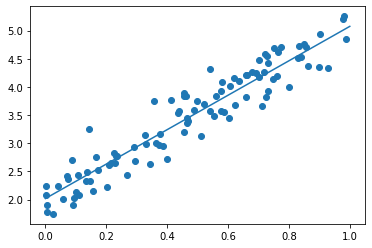

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 3 * x + 2

# ノイズを加える
noise = 0.3
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.placeholder(tf.float32, shape=[None,1])
dt = tf.placeholder(tf.float32, shape=[None,1])

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  noiseの値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 10. 誤差 = 0.45363176
Generation: 20. 誤差 = 0.38700545
Generation: 30. 誤差 = 0.36179855
Generation: 40. 誤差 = 0.34313613
Generation: 50. 誤差 = 0.3292743
Generation: 60. 誤差 = 0.31897807
Generation: 70. 誤差 = 0.31133038
Generation: 80. 誤差 = 0.30564988
Generation: 90. 誤差 = 0.3014306
Generation: 100. 誤差 = 0.2982966
Generation: 110. 誤差 = 0.29596883
Generation: 120. 誤差 = 0.29423976
Generation: 130. 誤差 = 0.29295543
Generation: 140. 誤差 = 0.29200155
Generation: 150. 誤差 = 0.29129297
Generation: 160. 誤差 = 0.2907667
Generation: 170. 誤差 = 0.29037574
Generation: 180. 誤差 = 0.2900854
Generation: 190. 誤差 = 0.28986967
Generation: 200. 誤差 = 0.28970954
Generation: 210. 誤差 = 0.28959054
Generation: 220. 誤差 = 0.28950214
Generation: 230. 誤差 = 0.28943652
Generation: 240. 誤差 = 0.28938773
Generation: 250. 誤差 = 0.28935152
Generation: 260. 誤差 = 0.2893246
Generation: 270. 誤差 = 0.28930464
Generation: 280. 誤差 = 0.28928977
Generation: 290. 誤差 = 0.28927878
Generation: 300. 誤差 = 0.28927058
[2.9030147]
[2.0283782]


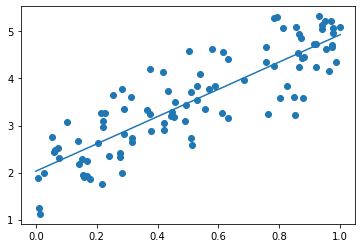

In [5]:
iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 3 * x + 2

# ノイズを加える
noise = 0.5
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.placeholder(tf.float32, shape=[None,1])
dt = tf.placeholder(tf.float32, shape=[None,1])

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-  dの数値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 10. 誤差 = 1.1912899
Generation: 20. 誤差 = 0.8824545
Generation: 30. 誤差 = 0.7081441
Generation: 40. 誤差 = 0.57207835
Generation: 50. 誤差 = 0.46567708
Generation: 60. 誤差 = 0.3824726
Generation: 70. 誤差 = 0.31740737
Generation: 80. 誤差 = 0.26652715
Generation: 90. 誤差 = 0.2267395
Generation: 100. 誤差 = 0.19562587
Generation: 110. 誤差 = 0.17129536
Generation: 120. 誤差 = 0.15226921
Generation: 130. 誤差 = 0.13739094
Generation: 140. 誤差 = 0.12575634
Generation: 150. 誤差 = 0.11665817
Generation: 160. 誤差 = 0.109543495
Generation: 170. 誤差 = 0.103979856
Generation: 180. 誤差 = 0.0996292
Generation: 190. 誤差 = 0.09622696
Generation: 200. 誤差 = 0.09356648
Generation: 210. 誤差 = 0.091486014
Generation: 220. 誤差 = 0.08985911
Generation: 230. 誤差 = 0.08858691
Generation: 240. 誤差 = 0.08759206
Generation: 250. 誤差 = 0.08681406
Generation: 260. 誤差 = 0.08620573
Generation: 270. 誤差 = 0.08572999
Generation: 280. 誤差 = 0.08535795
Generation: 290. 誤差 = 0.08506706
Generation: 300. 誤差 = 0.084839575
[5.992548]
[1.989115]

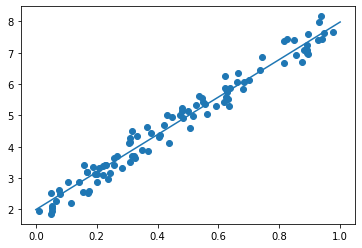

In [6]:
iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 6 * x + 2

# ノイズを加える
noise = 0.3
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.placeholder(tf.float32, shape=[None,1])
dt = tf.placeholder(tf.float32, shape=[None,1])

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

## 非線形回帰

Generation: 100. 誤差 = 22.386902
Generation: 200. 誤差 = 18.81442
Generation: 300. 誤差 = 15.721642
Generation: 400. 誤差 = 13.06303
Generation: 500. 誤差 = 10.794835
Generation: 600. 誤差 = 8.875175
Generation: 700. 誤差 = 7.2641597
Generation: 800. 誤差 = 5.924051
Generation: 900. 誤差 = 4.819442
Generation: 1000. 誤差 = 3.9174478
Generation: 1100. 誤差 = 3.187876
Generation: 1200. 誤差 = 2.6033554
Generation: 1300. 誤差 = 2.1394165
Generation: 1400. 誤差 = 1.7744963
Generation: 1500. 誤差 = 1.4898769
Generation: 1600. 誤差 = 1.2695339
Generation: 1700. 誤差 = 1.0999514
Generation: 1800. 誤差 = 0.96988654
Generation: 1900. 誤差 = 0.87011665
Generation: 2000. 誤差 = 0.79317933
Generation: 2100. 誤差 = 0.7331364
Generation: 2200. 誤差 = 0.6853373
Generation: 2300. 誤差 = 0.646212
Generation: 2400. 誤差 = 0.6130821
Generation: 2500. 誤差 = 0.58399045
Generation: 2600. 誤差 = 0.55754894
Generation: 2700. 誤差 = 0.53280747
Generation: 2800. 誤差 = 0.50914305
Generation: 2900. 誤差 = 0.48616844
Generation: 3000. 誤差 = 0.4636592
Generation: 3100. 

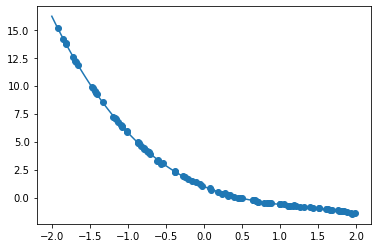

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  noiseの値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 100. 誤差 = 27.23654
Generation: 200. 誤差 = 22.924294
Generation: 300. 誤差 = 19.175873
Generation: 400. 誤差 = 15.940544
Generation: 500. 誤差 = 13.169413
Generation: 600. 誤差 = 10.815443
Generation: 700. 誤差 = 8.833521
Generation: 800. 誤差 = 7.180594
Generation: 900. 誤差 = 5.8158097
Generation: 1000. 誤差 = 4.7007294
Generation: 1100. 誤差 = 3.799532
Generation: 1200. 誤差 = 3.0792313
Generation: 1300. 誤差 = 2.5098789
Generation: 1400. 誤差 = 2.0646863
Generation: 1500. 誤差 = 1.7201142
Generation: 1600. 誤差 = 1.4558629
Generation: 1700. 誤差 = 1.2547389
Generation: 1800. 誤差 = 1.1024915
Generation: 1900. 誤差 = 0.9875242
Generation: 2000. 誤差 = 0.90057683
Generation: 2100. 誤差 = 0.8343871
Generation: 2200. 誤差 = 0.78335357
Generation: 2300. 誤差 = 0.7432144
Generation: 2400. 誤差 = 0.71077657
Generation: 2500. 誤差 = 0.6836746
Generation: 2600. 誤差 = 0.66018724
Generation: 2700. 誤差 = 0.6390759
Generation: 2800. 誤差 = 0.6194685
Generation: 2900. 誤差 = 0.6007658
Generation: 3000. 誤差 = 0.5825676
Generation: 3100. 誤

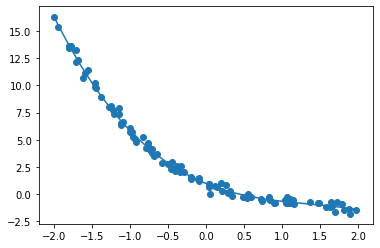

In [8]:
iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.3
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-  dの数値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 100. 誤差 = 116.7682
Generation: 200. 誤差 = 106.75042
Generation: 300. 誤差 = 97.41235
Generation: 400. 誤差 = 88.72116
Generation: 500. 誤差 = 80.64536
Generation: 600. 誤差 = 73.154655
Generation: 700. 誤差 = 66.21991
Generation: 800. 誤差 = 59.81302
Generation: 900. 誤差 = 53.9069
Generation: 1000. 誤差 = 48.475292
Generation: 1100. 誤差 = 43.492798
Generation: 1200. 誤差 = 38.934803
Generation: 1300. 誤差 = 34.7774
Generation: 1400. 誤差 = 30.997353
Generation: 1500. 誤差 = 27.572012
Generation: 1600. 誤差 = 24.47932
Generation: 1700. 誤差 = 21.697783
Generation: 1800. 誤差 = 19.206388
Generation: 1900. 誤差 = 16.984674
Generation: 2000. 誤差 = 15.012681
Generation: 2100. 誤差 = 13.270961
Generation: 2200. 誤差 = 11.7406
Generation: 2300. 誤差 = 10.4032545
Generation: 2400. 誤差 = 9.241149
Generation: 2500. 誤差 = 8.237171
Generation: 2600. 誤差 = 7.374884
Generation: 2700. 誤差 = 6.63863
Generation: 2800. 誤差 = 6.0135303
Generation: 2900. 誤差 = 5.4855933
Generation: 3000. 誤差 = 5.041775
Generation: 3100. 誤差 = 4.6699986
Gene

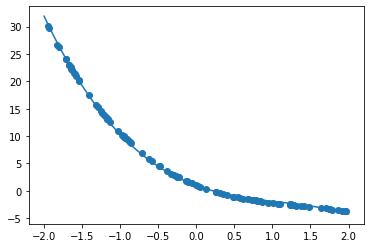

In [9]:
iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.8 * x ** 3 + 3.2 * x ** 2 - 5.6 * x + 1

#  ノイズを加える
noise = 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  次の式をモデルとして回帰を行おう
$$ y=30x^{2} +0.5x+0.2 $$<br>
-  誤差が収束するようiters_numやlearning_rateを調整しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 1000. 誤差 = 706.2854
Generation: 2000. 誤差 = 234.77386
Generation: 3000. 誤差 = 109.65452
Generation: 4000. 誤差 = 52.31584
Generation: 5000. 誤差 = 17.09086
Generation: 6000. 誤差 = 2.9314437
Generation: 7000. 誤差 = 0.16810723
Generation: 8000. 誤差 = 0.0014716951
Generation: 9000. 誤差 = 5.4334964e-07
Generation: 10000. 誤差 = 5.3697464e-09
Generation: 11000. 誤差 = 1.9382294e-09
Generation: 12000. 誤差 = 6.146385e-10
Generation: 13000. 誤差 = 2.351355e-10
Generation: 14000. 誤差 = 9.306402e-11
Generation: 15000. 誤差 = 3.1624526e-11
Generation: 16000. 誤差 = 1.4323067e-11
Generation: 17000. 誤差 = 7.732561e-12
Generation: 18000. 誤差 = 1.2731648e-10
Generation: 19000. 誤差 = 1.3347164e-11
Generation: 20000. 誤差 = 5.456178e-09
Generation: 21000. 誤差 = 8.870633e-10
Generation: 22000. 誤差 = 1.327909e-07
Generation: 23000. 誤差 = 1.2008656e-09
Generation: 24000. 誤差 = 3.1997078e-09
Generation: 25000. 誤差 = 3.3088328e-09
Generation: 26000. 誤差 = 4.6602235e-08
Generation: 27000. 誤差 = 1.2623189e-09
Generation: 28000. 誤差

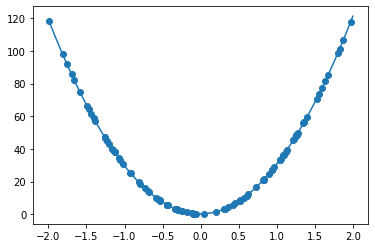

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 30000
plot_interval = 1000

input_layer_size = 3
output_layer_size = 1

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d = 30. * x ** 2 + 0.5 * x + 0.2

#  ノイズを加える
# noise = 0.05
# d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, input_layer_size])
dt = tf.placeholder(tf.float32, [None, output_layer_size])
W = tf.Variable(tf.random_normal([input_layer_size, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape([n, output_layer_size])
x_train = np.zeros([n, input_layer_size])
for i in range(n):
    for j in range(input_layer_size):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])    

# 予測関数
def predict(x):
    result = 0.
    for i in range(0,input_layer_size):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

## 分類1層 (mnist)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  x：入力値, d：教師データ, W：重み, b：バイアス をそれぞれ定義しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[ True False  True ...  True False False]
Generation: 1. 正解率 = 0.273
[ True False  True ... False False False]
Generation: 2. 正解率 = 0.4247
[ True  True  True ... False False False]
Generation: 3. 正解率 = 0.5216
[ True  True  True ...  True False False]
Generation: 4. 正解率 = 0.5963
[ True  True  True ... False False False]
Generation: 5. 正解率 = 0.5662
[ True  True  True ... False False False]
Generation: 6. 正解率 = 0.6029
[ True  True  True ... False False False]
Generation: 7. 正解率 = 0.6534
[ True  True  True ... False False False]
Generation: 8. 正解率 = 0.6529
[ True  True  True ...  True False  True]
Generation: 9. 正解率 = 0.7283
[ True  True  True ...  True False  True]
Generation: 10. 正解率 = 0.7311
[ True  True  True ... False False  True]
Generation: 11. 正解率 = 0.7232
[ True  True  True ... False False 

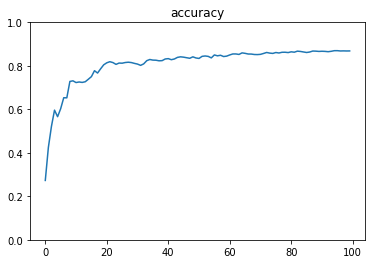

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 100
batch_size = 100
plot_interval = 1

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# 交差エントロピー
cross_entropy = -tf.reduce_sum(d * tf.log(y), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 正誤を保存
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
# 正解率
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch})
    if (i+1) % plot_interval == 0:
        print(sess.run(correct, feed_dict={x: mnist.test.images, d: mnist.test.labels}))
        accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images, d: mnist.test.labels})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()        

## 分類3層 (mnist)

tf.train.AdamOptimizer<br>
`__init__(
    learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08,
    use_locking=False,
    name='Adam'
)`

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1135
Generation: 200. 正解率 = 0.4333
Generation: 300. 正解率 = 0.4158
Generation: 400. 正解率 = 0.5453
Generation: 500. 正解率 = 0.606
Generation: 600. 正解率 = 0.6655
Generation: 700. 正解率 = 0.6826
Generation: 800. 正解率 = 0.7353
Generation: 900. 正解率 = 0.7563
Generation: 1000. 正解率 = 0.7912
Generation: 1100. 正解率 = 0.8074
Generation: 1200. 正解率 = 0.8185
Generation: 1300. 正解率 = 0.8342
Generation: 1400. 正解率 = 0.8466
Generation: 1500. 正解率 = 0.8557
Generation: 1600. 正解率 = 0.8605
Generation: 1700. 正解率 = 0.8691
Generation: 1800. 正解率 = 0.8727
Generation: 1900. 正解率 = 0.8779
Generation: 2000. 正解率 = 0.8804
Generation: 2100. 正解率 = 0.8851
Generation: 2200. 正解率 = 0.8855
Generation: 2300. 正解率 = 0.8906
Generation: 2400. 正解率 = 0.8923
Generation: 2500. 正解率 = 0.8944
Generation: 2600. 正解率 = 0.8967
Generation

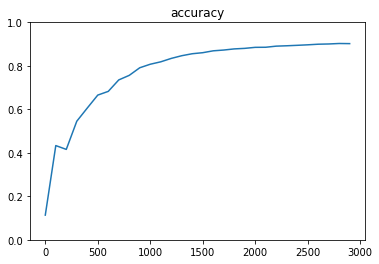

In [12]:
import tensorflow as tf
import numpy as np

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


# optimizer = tf.train.GradientDescentOptimizer(0.5)
# optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
# optimizer = tf.train.AdagradOptimizer(0.1)
# optimizer = tf.train.RMSPropOptimizer(0.001)
optimizer = tf.train.AdamOptimizer(1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  隠れ層のサイズを変更してみよう

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.118
Generation: 200. 正解率 = 0.4211
Generation: 300. 正解率 = 0.5632
Generation: 400. 正解率 = 0.6904
Generation: 500. 正解率 = 0.7538
Generation: 600. 正解率 = 0.7926
Generation: 700. 正解率 = 0.8232
Generation: 800. 正解率 = 0.8404
Generation: 900. 正解率 = 0.8496
Generation: 1000. 正解率 = 0.8644
Generation: 1100. 正解率 = 0.8706
Generation: 1200. 正解率 = 0.8775
Generation: 1300. 正解率 = 0.8833
Generation: 1400. 正解率 = 0.8864
Generation: 1500. 正解率 = 0.8923
Generation: 1600. 正解率 = 0.8964
Generation: 1700. 正解率 = 0.8988
Generation: 1800. 正解率 = 0.9
Generation: 1900. 正解率 = 0.9033
Generation: 2000. 正解率 = 0.9043
Generation: 2100. 正解率 = 0.9056
Generation: 2200. 正解率 = 0.9079
Generation: 2300. 正解率 = 0.9084
Generation: 2400. 正解率 = 0.911
Generation: 2500. 正解率 = 0.9107
Generation: 2600. 正解率 = 0.9129
Generation: 27

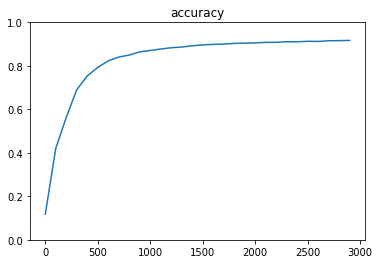

In [13]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 1200
hidden_layer_size_2 = 600

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


# optimizer = tf.train.GradientDescentOptimizer(0.5)
# optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
# optimizer = tf.train.AdagradOptimizer(0.1)
# optimizer = tf.train.RMSPropOptimizer(0.001)
optimizer = tf.train.AdamOptimizer(1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-  optimizerを変更しよう<br>

tf.train.GradientDescentOptimizer<br>
`__init__(
    learning_rate,
    use_locking=False,
    name='GradientDescent'
)`

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1135
Generation: 200. 正解率 = 0.1381
Generation: 300. 正解率 = 0.1868
Generation: 400. 正解率 = 0.2368
Generation: 500. 正解率 = 0.328
Generation: 600. 正解率 = 0.4213
Generation: 700. 正解率 = 0.5219
Generation: 800. 正解率 = 0.5809
Generation: 900. 正解率 = 0.7111
Generation: 1000. 正解率 = 0.7673
Generation: 1100. 正解率 = 0.7804
Generation: 1200. 正解率 = 0.8158
Generation: 1300. 正解率 = 0.8289
Generation: 1400. 正解率 = 0.8574
Generation: 1500. 正解率 = 0.8651
Generation: 1600. 正解率 = 0.8758
Generation: 1700. 正解率 = 0.8839
Generation: 1800. 正解率 = 0.8888
Generation: 1900. 正解率 = 0.896
Generation: 2000. 正解率 = 0.8905
Generation: 2100. 正解率 = 0.9006
Generation: 2200. 正解率 = 0.8998
Generation: 2300. 正解率 = 0.9018
Generation: 2400. 正解率 = 0.9052
Generation: 2500. 正解率 = 0.9067
Generation: 2600. 正解率 = 0.9094
Generation:

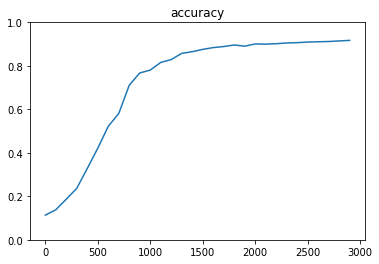

In [14]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.GradientDescentOptimizer(0.5)
# optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
# optimizer = tf.train.AdagradOptimizer(0.1)
# optimizer = tf.train.RMSPropOptimizer(0.001)
# optimizer = tf.train.AdamOptimizer(1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

tf.train.MomentumOptimizer<br>
`__init__(
    learning_rate,
    momentum,
    use_locking=False,
    name='Momentum',
    use_nesterov=False
)`

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1135
Generation: 200. 正解率 = 0.1193
Generation: 300. 正解率 = 0.3814
Generation: 400. 正解率 = 0.5553
Generation: 500. 正解率 = 0.7136
Generation: 600. 正解率 = 0.7906
Generation: 700. 正解率 = 0.8573
Generation: 800. 正解率 = 0.8802
Generation: 900. 正解率 = 0.8949
Generation: 1000. 正解率 = 0.9007
Generation: 1100. 正解率 = 0.9039
Generation: 1200. 正解率 = 0.9084
Generation: 1300. 正解率 = 0.9106
Generation: 1400. 正解率 = 0.9143
Generation: 1500. 正解率 = 0.9192
Generation: 1600. 正解率 = 0.9191
Generation: 1700. 正解率 = 0.9246
Generation: 1800. 正解率 = 0.9281
Generation: 1900. 正解率 = 0.9275
Generation: 2000. 正解率 = 0.9311
Generation: 2100. 正解率 = 0.9306
Generation: 2200. 正解率 = 0.932
Generation: 2300. 正解率 = 0.9326
Generation: 2400. 正解率 = 0.9376
Generation: 2500. 正解率 = 0.9392
Generation: 2600. 正解率 = 0.9403
Generation

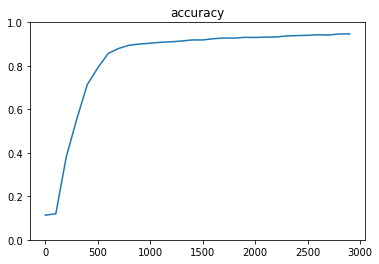

In [15]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


# optimizer = tf.train.GradientDescentOptimizer(0.5)
optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
# optimizer = tf.train.AdagradOptimizer(0.1)
# optimizer = tf.train.RMSPropOptimizer(0.001)
# optimizer = tf.train.AdamOptimizer(1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
tf.train.AdagradOptimizer<br>
`__init__(
    learning_rate,
    initial_accumulator_value=0.1,
    use_locking=False,
    name='Adagrad'
)`

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1135
Generation: 200. 正解率 = 0.1135
Generation: 300. 正解率 = 0.1135
Generation: 400. 正解率 = 0.1028
Generation: 500. 正解率 = 0.1928
Generation: 600. 正解率 = 0.3328
Generation: 700. 正解率 = 0.4006
Generation: 800. 正解率 = 0.5252
Generation: 900. 正解率 = 0.6346
Generation: 1000. 正解率 = 0.6854
Generation: 1100. 正解率 = 0.7522
Generation: 1200. 正解率 = 0.7725
Generation: 1300. 正解率 = 0.7895
Generation: 1400. 正解率 = 0.8166
Generation: 1500. 正解率 = 0.8295
Generation: 1600. 正解率 = 0.8379
Generation: 1700. 正解率 = 0.8462
Generation: 1800. 正解率 = 0.8511
Generation: 1900. 正解率 = 0.8567
Generation: 2000. 正解率 = 0.8607
Generation: 2100. 正解率 = 0.8704
Generation: 2200. 正解率 = 0.8728
Generation: 2300. 正解率 = 0.8746
Generation: 2400. 正解率 = 0.8835
Generation: 2500. 正解率 = 0.8796
Generation: 2600. 正解率 = 0.8865
Generatio

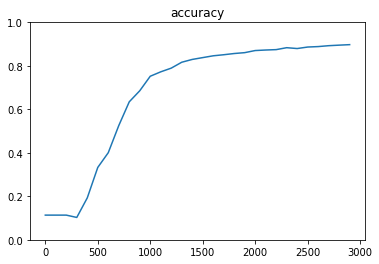

In [16]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


# optimizer = tf.train.GradientDescentOptimizer(0.5)
# optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
optimizer = tf.train.AdagradOptimizer(0.1)
# optimizer = tf.train.RMSPropOptimizer(0.001)
# optimizer = tf.train.AdamOptimizer(1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
tf.train.RMSPropOptimizer<br>
`__init__(
    learning_rate,
    decay=0.9,
    momentum=0.0,
    epsilon=1e-10,
    use_locking=False,
    centered=False,
    name='RMSProp'
)`

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.101
Generation: 200. 正解率 = 0.1028
Generation: 300. 正解率 = 0.7412
Generation: 400. 正解率 = 0.8553
Generation: 500. 正解率 = 0.8778
Generation: 600. 正解率 = 0.8971
Generation: 700. 正解率 = 0.9059
Generation: 800. 正解率 = 0.9149
Generation: 900. 正解率 = 0.9213
Generation: 1000. 正解率 = 0.9266
Generation: 1100. 正解率 = 0.9331
Generation: 1200. 正解率 = 0.9366
Generation: 1300. 正解率 = 0.9398
Generation: 1400. 正解率 = 0.9416
Generation: 1500. 正解率 = 0.9451
Generation: 1600. 正解率 = 0.9488
Generation: 1700. 正解率 = 0.9537
Generation: 1800. 正解率 = 0.9502
Generation: 1900. 正解率 = 0.9548
Generation: 2000. 正解率 = 0.9553
Generation: 2100. 正解率 = 0.9585
Generation: 2200. 正解率 = 0.9584
Generation: 2300. 正解率 = 0.9586
Generation: 2400. 正解率 = 0.9606
Generation: 2500. 正解率 = 0.9617
Generation: 2600. 正解率 = 0.9643
Generation

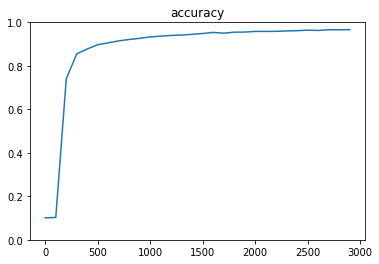

In [17]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


# optimizer = tf.train.GradientDescentOptimizer(0.5)
# optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
# optimizer = tf.train.AdagradOptimizer(0.1)
optimizer = tf.train.RMSPropOptimizer(0.001)
# optimizer = tf.train.AdamOptimizer(1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

## 分類CNN (mnist)
conv - relu - pool - conv - relu - pool - <br>
affin - relu - dropout - affin - softmax<br>

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 10. 正解率 = 0.22
Generation: 20. 正解率 = 0.54
Generation: 30. 正解率 = 0.63
Generation: 40. 正解率 = 0.75
Generation: 50. 正解率 = 0.73
Generation: 60. 正解率 = 0.71
Generation: 70. 正解率 = 0.78
Generation: 80. 正解率 = 0.85
Generation: 90. 正解率 = 0.84
Generation: 100. 正解率 = 0.82
Generation: 110. 正解率 = 0.91
Generation: 120. 正解率 = 0.91
Generation: 130. 正解率 = 0.9
Generation: 140. 正解率 = 0.91
Generation: 150. 正解率 = 0.96
Generation: 160. 正解率 = 0.94
Generation: 170. 正解率 = 0.93
Generation: 180. 正解率 = 0.9
Generation: 190. 正解率 = 0.92
Generation: 200. 正解率 = 0.92
Generation: 210. 正解率 = 0.96
Generation: 220. 正解率 = 0.89
Generation: 230. 正解率 = 0.96
Generation: 240. 正解率 = 0.94
Generation: 250. 正解率 = 0.95
Generation: 260. 正解率 = 0.95
Generation: 270. 正解率 = 0.91
Generation: 280. 正解率 = 0.94
Generation: 290. 正解率 = 0.93
Gener

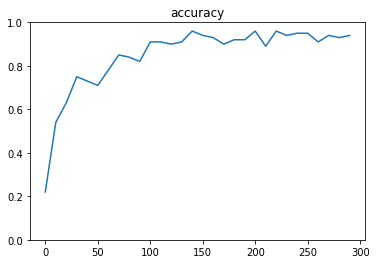

In [18]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import matplotlib.pyplot as plt

iters_num = 300
batch_size = 100
plot_interval = 10

dropout_rate = 0.5

# placeholder
x = tf.placeholder(tf.float32, shape=[None, 784])
d = tf.placeholder(tf.float32, shape=[None, 10])

# 画像を784の一次元から28x28の二次元に変換する
# 画像を28x28にreshape
x_image = tf.reshape(x, [-1,28,28,1])

# 第一層のweightsとbiasのvariable
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

# 第一層のconvolutionalとpool
# strides[0] = strides[3] = 1固定
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
# プーリングサイズ n*n にしたい場合 ksize=[1, n, n, 1]
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第二層
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第一層と第二層でreduceされてできた特徴に対してrelu
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 出来上がったものに対してSoftmax
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 交差エントロピー
loss = -tf.reduce_sum(d * tf.log(y_conv))

train = tf.train.AdamOptimizer(1e-4).minimize(loss)

correct = tf.equal(tf.argmax(y_conv,1), tf.argmax(d,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob: 1-dropout_rate})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:x_batch, d: d_batch, keep_prob: 1.0})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()                

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  ドロップアウト率を0に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 10. 正解率 = 0.26
Generation: 20. 正解率 = 0.45
Generation: 30. 正解率 = 0.73
Generation: 40. 正解率 = 0.71
Generation: 50. 正解率 = 0.79
Generation: 60. 正解率 = 0.87
Generation: 70. 正解率 = 0.86
Generation: 80. 正解率 = 0.82
Generation: 90. 正解率 = 0.82
Generation: 100. 正解率 = 0.88
Generation: 110. 正解率 = 0.92
Generation: 120. 正解率 = 0.9
Generation: 130. 正解率 = 0.92
Generation: 140. 正解率 = 0.88
Generation: 150. 正解率 = 0.89
Generation: 160. 正解率 = 0.96
Generation: 170. 正解率 = 0.86
Generation: 180. 正解率 = 0.95
Generation: 190. 正解率 = 0.97
Generation: 200. 正解率 = 0.91
Generation: 210. 正解率 = 0.92
Generation: 220. 正解率 = 0.91
Generation: 230. 正解率 = 0.93
Generation: 240. 正解率 = 0.95
Generation: 250. 正解率 = 0.9
Generation: 260. 正解率 = 0.94
Generation: 270. 正解率 = 0.89
Generation: 280. 正解率 = 0.94
Generation: 290. 正解率 = 0.92
Generation: 300. 正解率 = 0.96


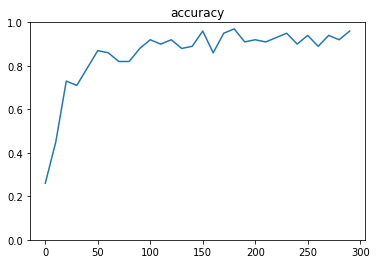

In [19]:
iters_num = 300
batch_size = 100
plot_interval = 10

dropout_rate = 0

# placeholder
x = tf.placeholder(tf.float32, shape=[None, 784])
d = tf.placeholder(tf.float32, shape=[None, 10])

# 画像を784の一次元から28x28の二次元に変換する
# 画像を28x28にreshape
x_image = tf.reshape(x, [-1,28,28,1])

# 第一層のweightsとbiasのvariable
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

# 第一層のconvolutionalとpool
# strides[0] = strides[3] = 1固定
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
# プーリングサイズ n*n にしたい場合 ksize=[1, n, n, 1]
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第二層
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第一層と第二層でreduceされてできた特徴に対してrelu
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 出来上がったものに対してSoftmax
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 交差エントロピー
loss = -tf.reduce_sum(d * tf.log(y_conv))

train = tf.train.AdamOptimizer(1e-4).minimize(loss)

correct = tf.equal(tf.argmax(y_conv,1), tf.argmax(d,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob: 1-dropout_rate})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:x_batch, d: d_batch, keep_prob: 1.0})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()                